In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import altair as alt
import matplotlib.pyplot as plt
import folium
import plotly.io as pio
import plotly.express as px
from vega_datasets import data
pd.set_option('max_colwidth', 400)

In [2]:
#reading the data into the df
happiness_df = pd.read_csv('Resources/happiness_merged.csv')
happiness_df.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Lower_Confidence_Interval,Upper_Confidence_Interval,GDP_per_capita,Family,Social_Support,Life_Expectancy,Freedom,Trust_Gov_Corruption,Generosity,Dystopia_Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,NaN,NaN,1.39651,1.34951,NaN,94,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,NaN,NaN,1.30232,1.40223,NaN,95,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,NaN,NaN,1.32548,1.36058,NaN,87,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,NaN,NaN,1.45900,1.33095,NaN,89,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,NaN,NaN,1.32629,1.32261,NaN,91,0.63297,0.32957,0.45811,2.45176,2015


In [5]:
#getting columns
happiness_df.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Lower_Confidence_Interval',
       'Upper_Confidence_Interval', 'GDP_per_capita', 'Family',
       'Social_Support', 'Life_Expectancy', 'Freedom', 'Trust_Gov_Corruption',
       'Generosity', 'Dystopia_Residual', 'Year'],
      dtype='object')

In [6]:
countries = happiness_df['Country'].unique()
year = happiness_df['Year'].unique()
region = happiness_df['Region'].unique()
print(len(countries))
print(len(region))
print(len(year))

170
10
5


In [7]:
happiness_df.isna()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Lower_Confidence_Interval,Upper_Confidence_Interval,GDP_per_capita,Family,Social_Support,Life_Expectancy,Freedom,Trust_Gov_Corruption,Generosity,Dystopia_Residual,Year
0,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,False,False,False,False,True,True,True,False,True,False,False,False,False,False,True,False
778,False,False,False,False,True,True,True,False,True,False,False,False,False,False,True,False
779,False,False,False,False,True,True,True,False,True,False,False,False,False,False,True,False
780,False,False,False,False,True,True,True,False,True,False,False,False,False,False,True,False


In [8]:
twentyfifteen = happiness_df.query('Year==2015')
twentyfifteen.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Lower_Confidence_Interval,Upper_Confidence_Interval,GDP_per_capita,Family,Social_Support,Life_Expectancy,Freedom,Trust_Gov_Corruption,Generosity,Dystopia_Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,NaN,NaN,1.39651,1.34951,NaN,94,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,NaN,NaN,1.30232,1.40223,NaN,95,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,NaN,NaN,1.32548,1.36058,NaN,87,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,NaN,NaN,1.45900,1.33095,NaN,89,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,NaN,NaN,1.32629,1.32261,NaN,91,0.63297,0.32957,0.45811,2.45176,2015


In [9]:
chart = alt.Chart(twentyfifteen, title= "Happiness VS. Life Expectancy for Year 2015").mark_point(size=60).encode(
    x='Happiness_Score',
    y='Life_Expectancy',
    tooltip=['Country','Happiness_Score','Life_Expectancy']
).interactive()

chart.save('2015_Life_Expectancy.html', embed_options={'actions': False})

In [10]:
chart = alt.Chart(twentyfifteen, title= "Happiness VS. GDP per capita for Year 2015").mark_circle(size=60).encode(
    x='Happiness_Score',
    y='GDP_per_capita',
    tooltip=['Country','Happiness_Score','GDP_per_capita']
).interactive()
chart.save('2015_GDP.html', embed_options={'actions': False})

In [11]:
twentysixteen = happiness_df.query('Year==2016')
twentysixteen.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Lower_Confidence_Interval,Upper_Confidence_Interval,GDP_per_capita,Family,Social_Support,Life_Expectancy,Freedom,Trust_Gov_Corruption,Generosity,Dystopia_Residual,Year
158,Denmark,Western Europe,1,7.526,NaN,7.460,7.592,1.44178,1.16374,NaN,80,0.57941,0.44453,0.36171,2.73939,2016
159,Switzerland,Western Europe,2,7.509,NaN,7.428,7.590,1.52733,1.14524,NaN,86,0.58557,0.41203,0.28083,2.69463,2016
160,Iceland,Western Europe,3,7.501,NaN,7.333,7.669,1.42666,1.18326,NaN,87,0.56624,0.14975,0.47678,2.83137,2016
161,Norway,Western Europe,4,7.498,NaN,7.421,7.575,1.57744,1.12690,NaN,80,0.59609,0.35776,0.37895,2.66465,2016
162,Finland,Western Europe,5,7.413,NaN,7.351,7.475,1.40598,1.13464,NaN,81,0.57104,0.41004,0.25492,2.82596,2016


In [12]:
chart = alt.Chart(twentysixteen, title= "Happiness VS. Life Expectancy for Year 2016").mark_point(size=60).encode(
    x='Happiness_Score',
    y='Life_Expectancy',
    tooltip=['Country','Happiness_Score','Life_Expectancy']
).interactive()
chart.save('2016_Life_Expectancy.html', embed_options={'actions': False})

In [13]:
chart = alt.Chart(twentysixteen, title= "Happiness VS. GDP per capita for Year 2016").mark_circle(size=60).encode(
    x='Happiness_Score',
    y='GDP_per_capita',
    tooltip=['Country','Happiness_Score','GDP_per_capita']
).interactive()
chart.save('2016_GDP.html', embed_options={'actions': False})

In [14]:
twentyseventeen = happiness_df.query('Year==2017')
twentyseventeen.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Lower_Confidence_Interval,Upper_Confidence_Interval,GDP_per_capita,Family,Social_Support,Life_Expectancy,Freedom,Trust_Gov_Corruption,Generosity,Dystopia_Residual,Year
315,Norway,Western Europe,1,7.537,NaN,7.479556,7.594445,1.616463,1.533524,NaN,80,0.635423,0.315964,0.362012,2.277027,2017
316,Denmark,Western Europe,2,7.522,NaN,7.462272,7.581728,1.482383,1.551122,NaN,79,0.626007,0.400770,0.355280,2.313707,2017
317,Iceland,Western Europe,3,7.504,NaN,7.385970,7.622030,1.480633,1.610574,NaN,83,0.627163,0.153527,0.475540,2.322715,2017
318,Switzerland,Western Europe,4,7.494,NaN,7.426227,7.561772,1.564980,1.516912,NaN,86,0.620071,0.367007,0.290549,2.276716,2017
319,Finland,Western Europe,5,7.469,NaN,7.410458,7.527542,1.443572,1.540247,NaN,81,0.617951,0.382612,0.245483,2.430182,2017


In [15]:
chart = alt.Chart(twentyseventeen, title ="Happiness VS. Life Expectancy for Year 2017").mark_point(size=60).encode(
    x='Happiness_Score',
    y='Life_Expectancy',
    tooltip=['Country','Happiness_Score','Life_Expectancy']
).interactive()
chart.save('2017_Life_Expectancy.html', embed_options={'actions': False})

In [16]:
chart = alt.Chart(twentyseventeen, title= "Happiness VS. GDP per capita for Year 2017").mark_circle(size=60).encode(
    x='Happiness_Score',
    y='GDP_per_capita',
    tooltip=['Country','Happiness_Score','GDP_per_capita']
).interactive()
chart.save('2017_GDP.html', embed_options={'actions': False})

In [17]:
twentyeighteen = happiness_df.query('Year==2017')
twentyeighteen.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Lower_Confidence_Interval,Upper_Confidence_Interval,GDP_per_capita,Family,Social_Support,Life_Expectancy,Freedom,Trust_Gov_Corruption,Generosity,Dystopia_Residual,Year
315,Norway,Western Europe,1,7.537,NaN,7.479556,7.594445,1.616463,1.533524,NaN,80,0.635423,0.315964,0.362012,2.277027,2017
316,Denmark,Western Europe,2,7.522,NaN,7.462272,7.581728,1.482383,1.551122,NaN,79,0.626007,0.400770,0.355280,2.313707,2017
317,Iceland,Western Europe,3,7.504,NaN,7.385970,7.622030,1.480633,1.610574,NaN,83,0.627163,0.153527,0.475540,2.322715,2017
318,Switzerland,Western Europe,4,7.494,NaN,7.426227,7.561772,1.564980,1.516912,NaN,86,0.620071,0.367007,0.290549,2.276716,2017
319,Finland,Western Europe,5,7.469,NaN,7.410458,7.527542,1.443572,1.540247,NaN,81,0.617951,0.382612,0.245483,2.430182,2017


In [18]:
chart = alt.Chart(twentyeighteen, title= "Happiness VS. Life Expectancy for Year 2018").mark_point(size=60).encode(
    x='Happiness_Score',
    y='Life_Expectancy',
    tooltip=['Country','Happiness_Score','Life_Expectancy']
).interactive()
chart.save('2018_Life_Expectancy.html', embed_options={'actions': False})

In [19]:
chart = alt.Chart(twentyeighteen, title= "Happiness VS. GDP per capita for Year 2018").mark_circle(size=60).encode(
    x='Happiness_Score',
    y='GDP_per_capita',
    tooltip=['Country','Happiness_Score','GDP_per_capita']
).interactive()
chart.save('2018_GDP.html', embed_options={'actions': False})

In [20]:
twentynineteen = happiness_df.query('Year==2017')
twentynineteen.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Lower_Confidence_Interval,Upper_Confidence_Interval,GDP_per_capita,Family,Social_Support,Life_Expectancy,Freedom,Trust_Gov_Corruption,Generosity,Dystopia_Residual,Year
315,Norway,Western Europe,1,7.537,NaN,7.479556,7.594445,1.616463,1.533524,NaN,80,0.635423,0.315964,0.362012,2.277027,2017
316,Denmark,Western Europe,2,7.522,NaN,7.462272,7.581728,1.482383,1.551122,NaN,79,0.626007,0.400770,0.355280,2.313707,2017
317,Iceland,Western Europe,3,7.504,NaN,7.385970,7.622030,1.480633,1.610574,NaN,83,0.627163,0.153527,0.475540,2.322715,2017
318,Switzerland,Western Europe,4,7.494,NaN,7.426227,7.561772,1.564980,1.516912,NaN,86,0.620071,0.367007,0.290549,2.276716,2017
319,Finland,Western Europe,5,7.469,NaN,7.410458,7.527542,1.443572,1.540247,NaN,81,0.617951,0.382612,0.245483,2.430182,2017


In [21]:
chart = alt.Chart(twentynineteen, title= "Happiness VS. Life Expectancy for Year 2019").mark_point(size=60).encode(
    x='Happiness_Score',
    y='Life_Expectancy',
    tooltip=['Country','Happiness_Score','Life_Expectancy']
).interactive()
chart.save('2019_Life_Expectancy.html', embed_options={'actions': False})

In [22]:
chart =alt.Chart(twentynineteen, title= "Happiness VS. GDP per capita for Year 2019").mark_circle(size=60).encode(
    x='Happiness_Score',
    y='GDP_per_capita',
    tooltip=['Country','Happiness_Score','GDP_per_capita']
).interactive()
chart.save('2019_GDP.html', embed_options={'actions': False})

In [23]:
#      Happiness Choropleth  2015      #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)
 
m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron")
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Happiness Scores for the Year 2015</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentyfifteen,
    columns=["Country", "Happiness_Score"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Happiness Score Per Country"
).add_to(m)
m.save("Happiness_Chor_2015.html")


In [24]:
#      Happiness Choropleth  2016      #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)
 
m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron")
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Happiness Scores for the Year 2016</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentysixteen,
    columns=["Country", "Happiness_Score"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Happiness Score Per Country"
).add_to(m)
m.save("Happiness_Chor_2016.html")


In [25]:
#      Happiness Choropleth  2017      #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)
 
m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron")
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Happiness Scores for the Year 2017</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentyseventeen,
    columns=["Country", "Happiness_Score"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Happiness Score Per Country"
).add_to(m)
m.save("Happiness_Chor_2017.html")


In [26]:
#      Happiness Choropleth  2018      #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)
 
m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron")
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Happiness Scores for the Year 2018</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentyeighteen,
    columns=["Country", "Happiness_Score"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Happiness Score Per Country"
).add_to(m)
m.save("Happiness_Chor_2018.html")


In [27]:
#      Happiness Choropleth  2019      #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)
 
m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron")
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Happiness Scores for the Year 2019</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentynineteen,
    columns=["Country", "Happiness_Score"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Happiness Score Per Country"
).add_to(m)
m.save("Happiness_Chor_2019.html")


In [28]:
#      GDP Choropleth   2015     #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron",)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>GDP Per Capita for the Year 2015</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentyfifteen,
    columns=["Country", "GDP_per_capita"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="GDP Per Capita"
).add_to(m)
m.save("GDP_Chor_2015.html")

In [29]:
#      GDP Choropleth   2016     #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron",)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>GDP Per Capita for the Year 2016</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentysixteen,
    columns=["Country", "GDP_per_capita"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="GDP Per Capita"
).add_to(m)
m.save("GDP_Chor_2016.html")

In [30]:
#      GDP Choropleth   2017     #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron",)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>GDP Per Capita for the Year 2017</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentyseventeen,
    columns=["Country", "GDP_per_capita"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="GDP Per Capita"
).add_to(m)
m.save("GDP_Chor_2017.html")

In [31]:
#      GDP Choropleth   2018     #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron",)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>GDP Per Capita for the Year 2018</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentyeighteen,
    columns=["Country", "GDP_per_capita"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="GDP Per Capita"
).add_to(m)
m.save("GDP_Chor_2018.html")

In [32]:
#      GDP Choropleth   2019     #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron",)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>GDP Per Capita for the Year 2019</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentynineteen,
    columns=["Country", "GDP_per_capita"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="GDP Per Capita"
).add_to(m)
m.save("GDP_Chor_2019.html")

In [33]:
#      Life Expectancy Choropleth  2015      #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron")
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Life Expectancy for the Year 2015</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentyfifteen,
    columns=["Country", "Life_Expectancy"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Life Expectancy Per Country"
).add_to(m)
m.save("Life_Chor_2015.html")

In [34]:
#      Life Expectancy Choropleth  2016      #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron")
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Life Expectancy for the Year 2016</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentysixteen,
    columns=["Country", "Life_Expectancy"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Life Expectancy Per Country"
).add_to(m)
m.save("Life_Chor_2016.html")

In [35]:
#      Life Expectancy Choropleth  2017      #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron")
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Life Expectancy for the Year 2017</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentyseventeen,
    columns=["Country", "Life_Expectancy"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Life Expectancy Per Country"
).add_to(m)
m.save("Life_Chor_2017.html")

In [36]:
#      Life Expectancy Choropleth  2018      #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron")
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Life Expectancy for the Year 2018</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentyeighteen,
    columns=["Country", "Life_Expectancy"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Life Expectancy Per Country"
).add_to(m)
m.save("Life_Chor_2018.html")

In [37]:
#      Life Expectancy Choropleth  2019      #
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(10, 10), zoom_start=2, tiles="cartodb positron")
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Life Expectancy for the Year 2019</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m
folium.Choropleth(
    geo_data=political_countries_url,
    data=twentynineteen,
    columns=["Country", "Life_Expectancy"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color="white",
    legend_name="Life Expectancy Per Country"
).add_to(m)
m.save("Life_Chor_2019.html")

In [38]:
regions = happiness_df['Region'].unique()
print(regions)

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [6]:
new_happiness_df = happiness_df[['Region', 'Year','Life_Expectancy','GDP_per_capita','Happiness_Score']]
life_expectancy_by_region = new_happiness_df.groupby(["Region","Year"]).mean()
life_expectancy_by_region_df = life_expectancy_by_region.reset_index()

In [7]:
life_expectancy_ssa = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Sub-Saharan Africa"]
life_expectancy_mena = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Middle East and Northern Africa"]
life_expectancy_we = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Western Europe"]
life_expectancy_au = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Australia and New Zealand"]
life_expectancy_lac = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Latin America and Caribbean"]
life_expectancy_sa = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Southeastern Asia"]
life_expectancy_cee = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Central and Eastern Europe"]
life_expectancy_rest_ea = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Eastern Asia"]
life_expectancy_saa = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Southern Asia"]
life_expectancy_na = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "North America"]

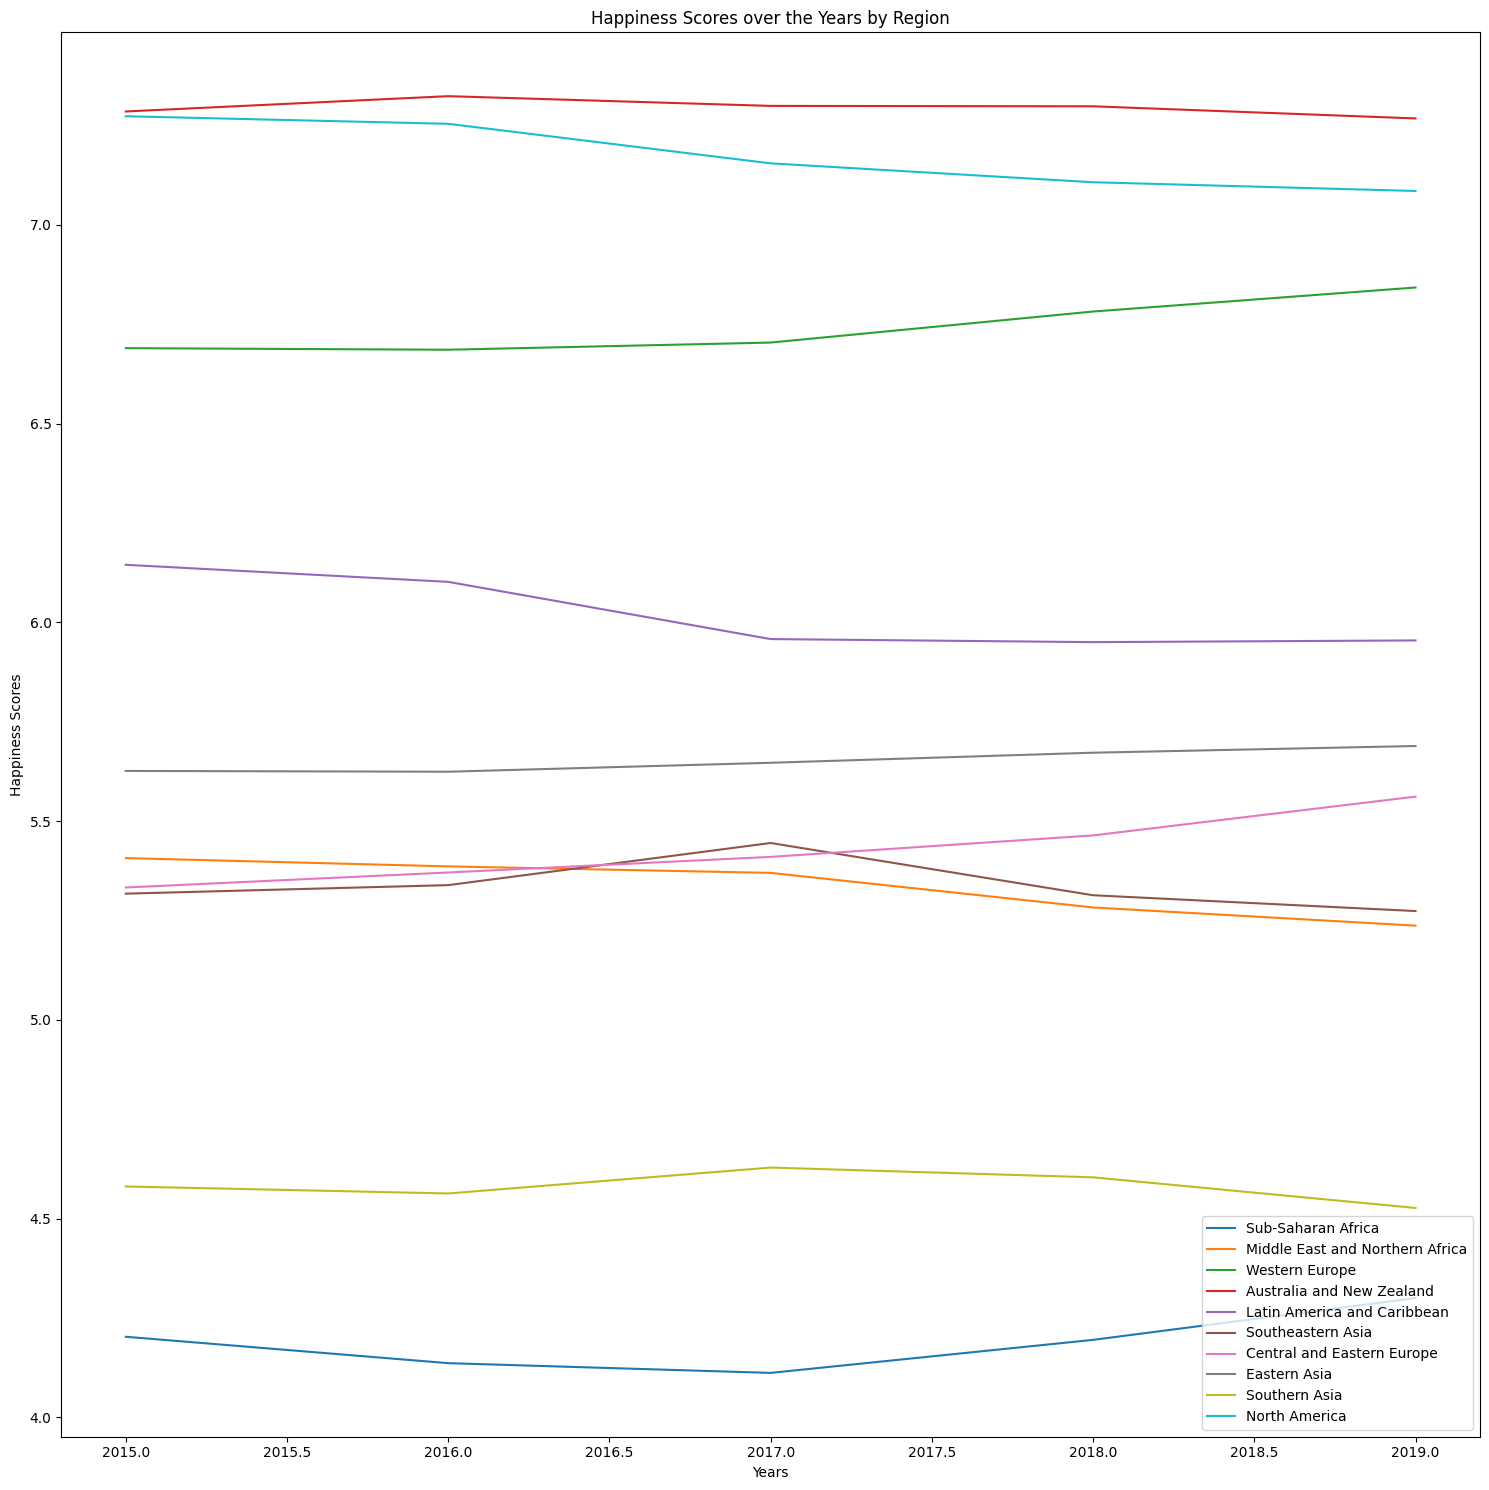

In [10]:
plt.figure(figsize = (15,15))
plt.plot(life_expectancy_ssa['Year'],life_expectancy_ssa['Happiness_Score'],label = "Sub-Saharan Africa")
plt.plot(life_expectancy_mena['Year'],life_expectancy_mena['Happiness_Score'], label = "Middle East and Northern Africa")
plt.plot(life_expectancy_we['Year'],life_expectancy_we['Happiness_Score'], label = "Western Europe")
plt.plot(life_expectancy_au['Year'],life_expectancy_au['Happiness_Score'], label = "Australia and New Zealand")
plt.plot(life_expectancy_lac['Year'],life_expectancy_lac['Happiness_Score'], label = "Latin America and Caribbean")
plt.plot(life_expectancy_sa['Year'],life_expectancy_sa['Happiness_Score'], label = "Southeastern Asia")
plt.plot(life_expectancy_cee['Year'],life_expectancy_cee['Happiness_Score'], label = "Central and Eastern Europe")
plt.plot(life_expectancy_rest_ea['Year'],life_expectancy_rest_ea['Happiness_Score'], label = "Eastern Asia")
plt.plot(life_expectancy_saa['Year'],life_expectancy_saa['Happiness_Score'], label = "Southern Asia")
plt.plot(life_expectancy_na['Year'],life_expectancy_na['Happiness_Score'], label = "North America")

plt.title("Happiness Scores over the Years by Region")
plt.xlabel("Years")
plt.ylabel("Happiness Scores")
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("line_chart_Happiness_Score.png")
plt.show()

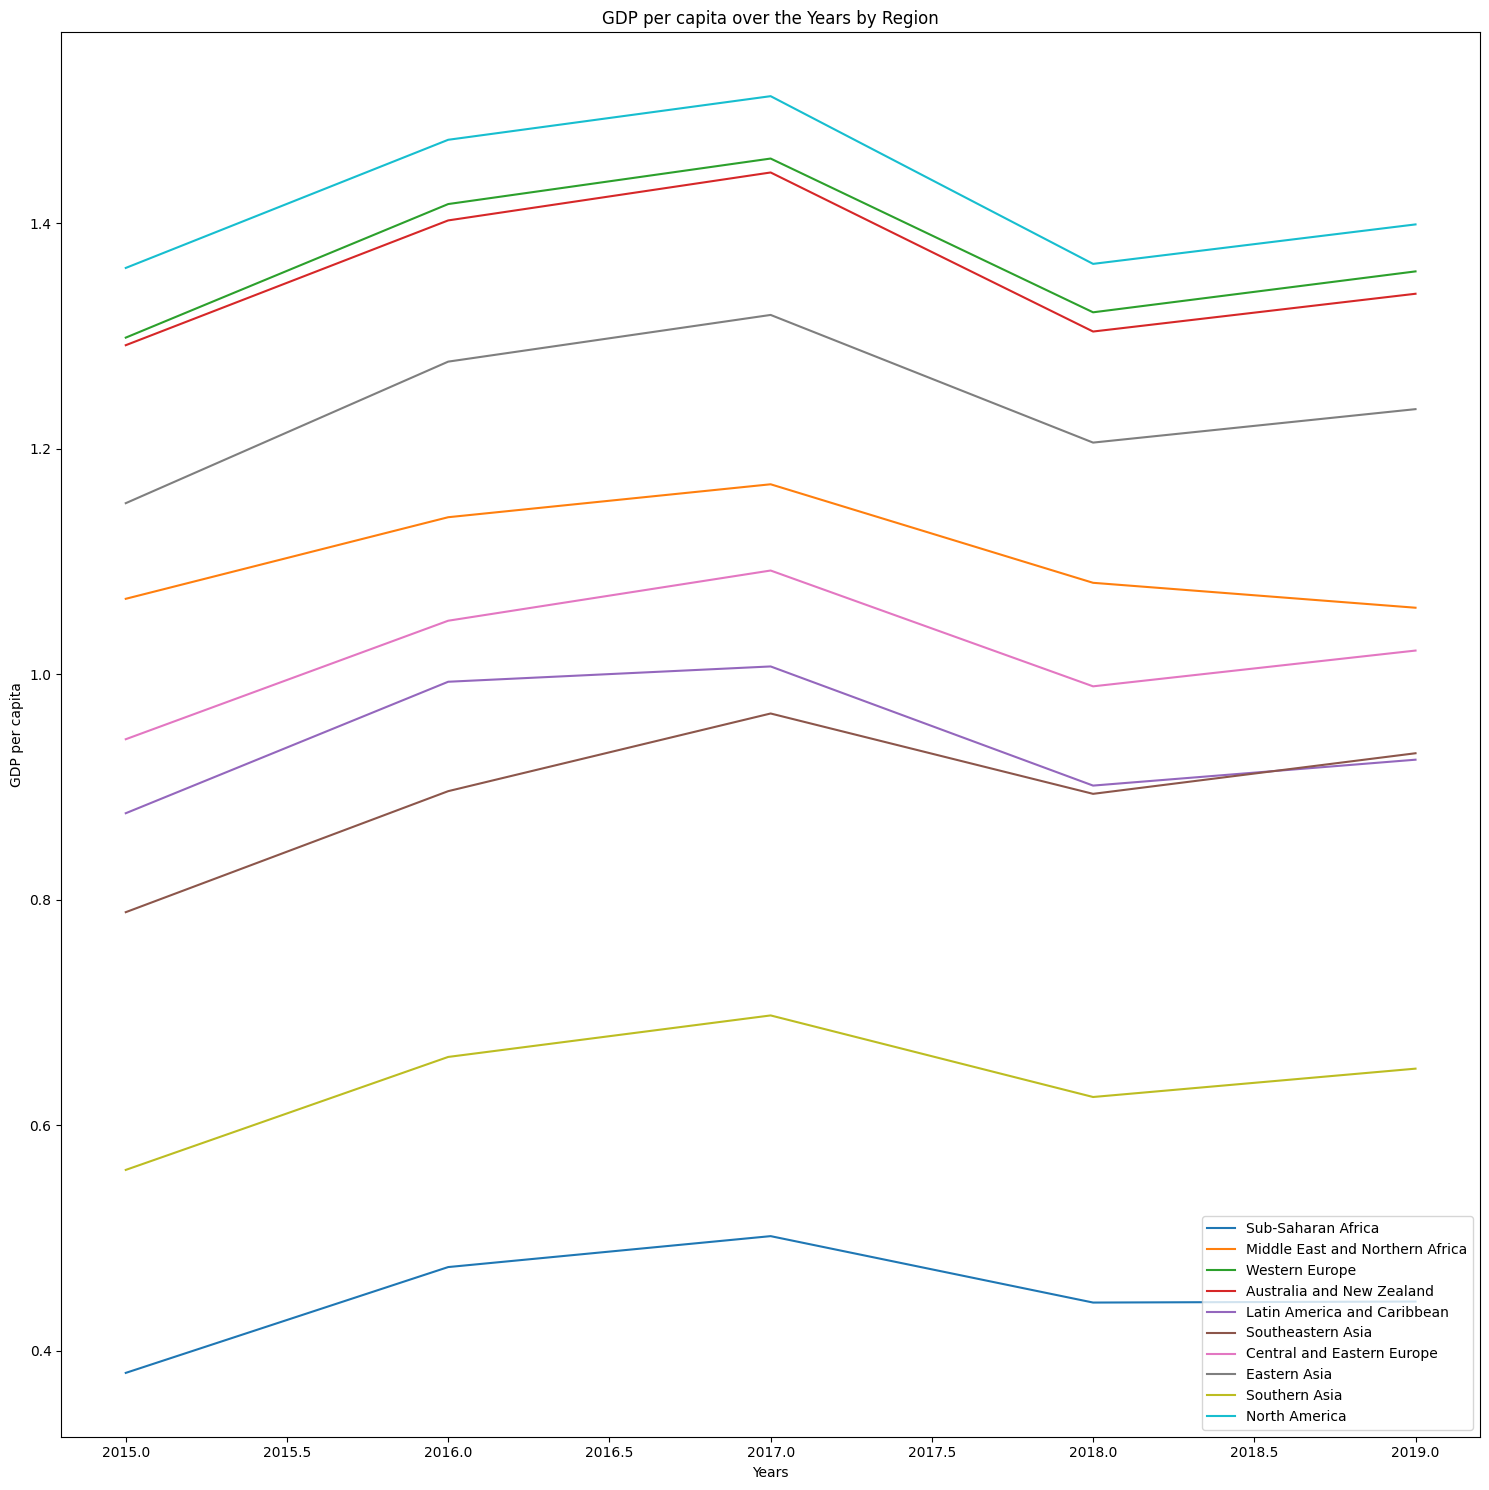

In [12]:
plt.figure(figsize = (15,15))
plt.plot(life_expectancy_ssa['Year'],life_expectancy_ssa['GDP_per_capita'],label = "Sub-Saharan Africa")
plt.plot(life_expectancy_mena['Year'],life_expectancy_mena['GDP_per_capita'], label = "Middle East and Northern Africa")
plt.plot(life_expectancy_we['Year'],life_expectancy_we['GDP_per_capita'], label = "Western Europe")
plt.plot(life_expectancy_au['Year'],life_expectancy_au['GDP_per_capita'], label = "Australia and New Zealand")
plt.plot(life_expectancy_lac['Year'],life_expectancy_lac['GDP_per_capita'], label = "Latin America and Caribbean")
plt.plot(life_expectancy_sa['Year'],life_expectancy_sa['GDP_per_capita'], label = "Southeastern Asia")
plt.plot(life_expectancy_cee['Year'],life_expectancy_cee['GDP_per_capita'], label = "Central and Eastern Europe")
plt.plot(life_expectancy_rest_ea['Year'],life_expectancy_rest_ea['GDP_per_capita'], label = "Eastern Asia")
plt.plot(life_expectancy_saa['Year'],life_expectancy_saa['GDP_per_capita'], label = "Southern Asia")
plt.plot(life_expectancy_na['Year'],life_expectancy_na['GDP_per_capita'], label = "North America")

plt.title("GDP per capita over the Years by Region")
plt.xlabel("Years")
plt.ylabel("GDP per capita")
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("line_chart_GDP_per_capita.png")
plt.show()

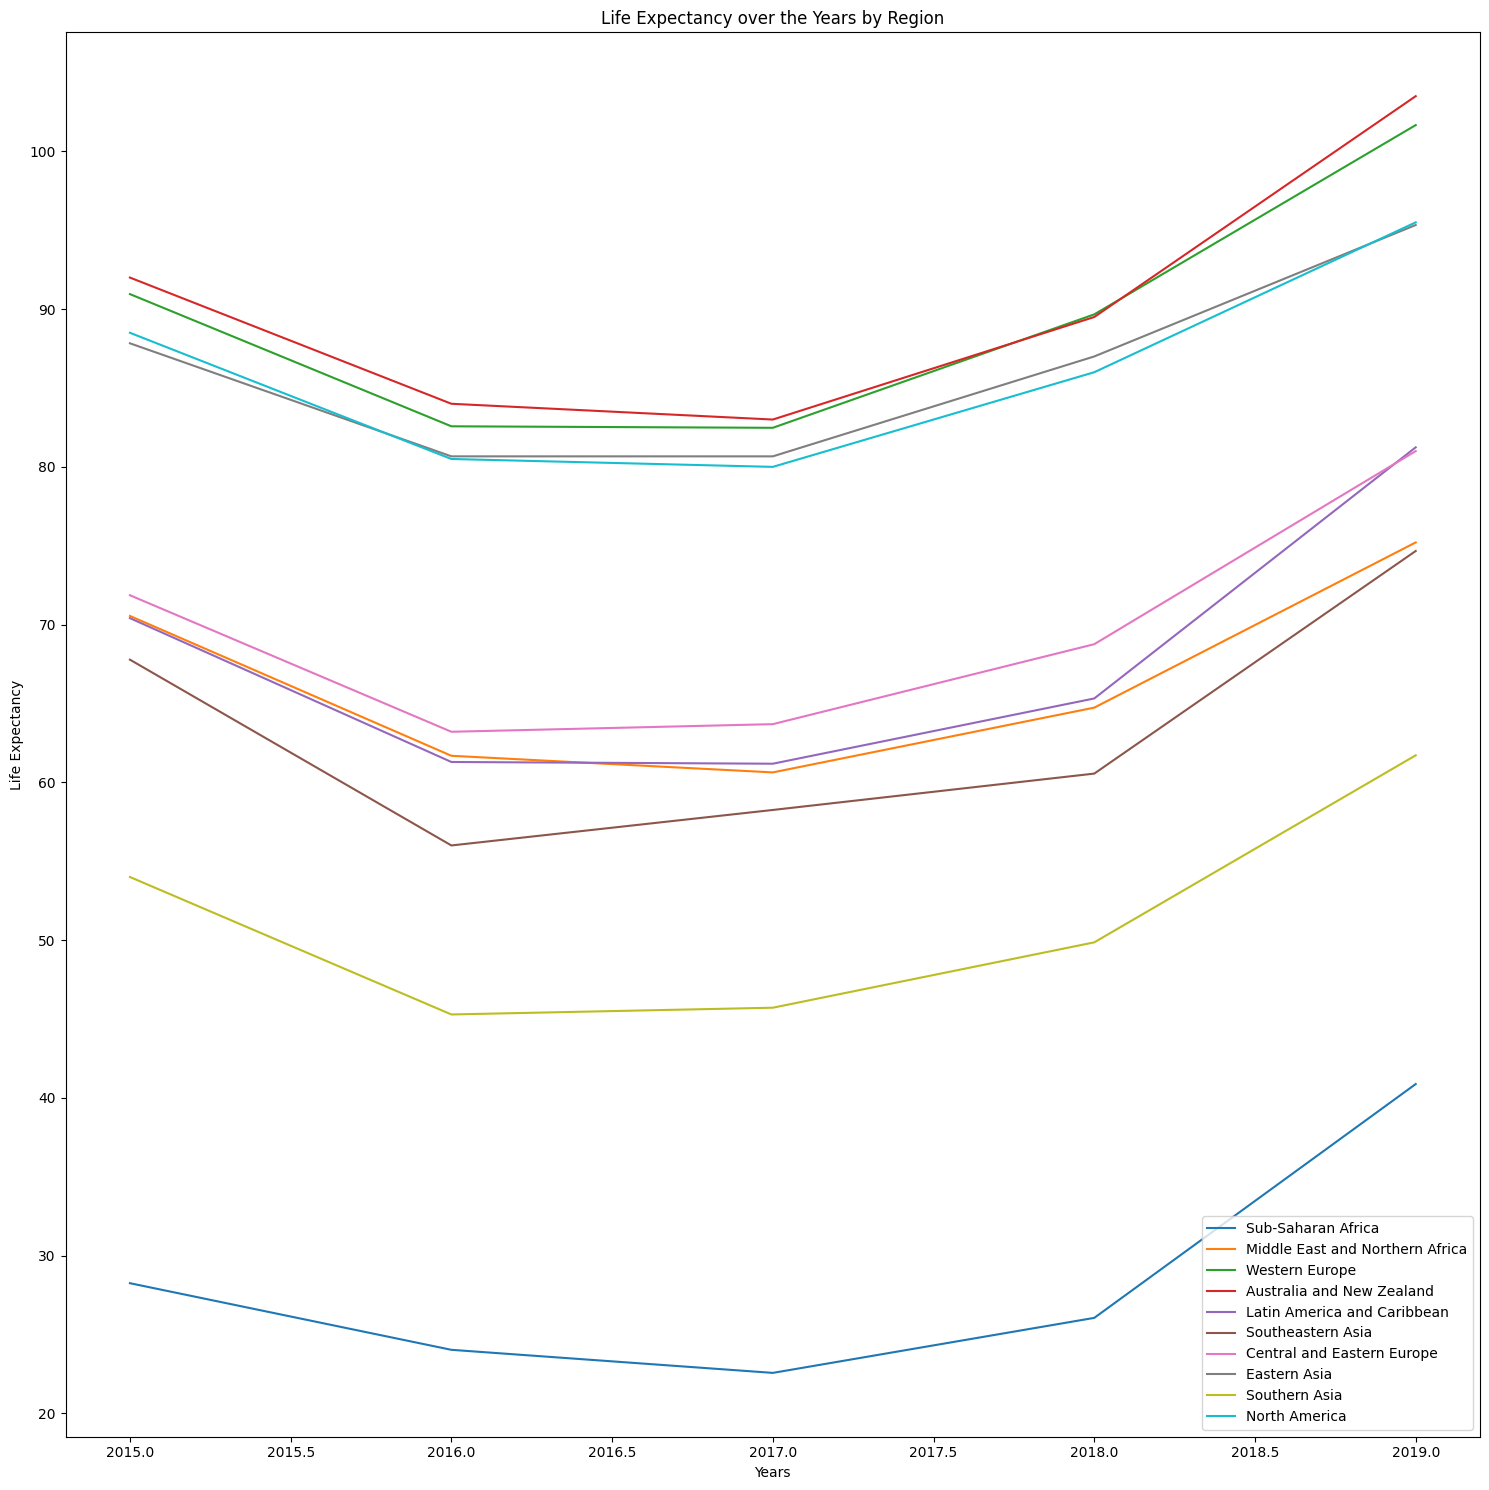

In [13]:
plt.figure(figsize = (15,15))
plt.plot(life_expectancy_ssa['Year'],life_expectancy_ssa['Life_Expectancy'],label = "Sub-Saharan Africa")
plt.plot(life_expectancy_mena['Year'],life_expectancy_mena['Life_Expectancy'], label = "Middle East and Northern Africa")
plt.plot(life_expectancy_we['Year'],life_expectancy_we['Life_Expectancy'], label = "Western Europe")
plt.plot(life_expectancy_au['Year'],life_expectancy_au['Life_Expectancy'], label = "Australia and New Zealand")
plt.plot(life_expectancy_lac['Year'],life_expectancy_lac['Life_Expectancy'], label = "Latin America and Caribbean")
plt.plot(life_expectancy_sa['Year'],life_expectancy_sa['Life_Expectancy'], label = "Southeastern Asia")
plt.plot(life_expectancy_cee['Year'],life_expectancy_cee['Life_Expectancy'], label = "Central and Eastern Europe")
plt.plot(life_expectancy_rest_ea['Year'],life_expectancy_rest_ea['Life_Expectancy'], label = "Eastern Asia")
plt.plot(life_expectancy_saa['Year'],life_expectancy_saa['Life_Expectancy'], label = "Southern Asia")
plt.plot(life_expectancy_na['Year'],life_expectancy_na['Life_Expectancy'], label = "North America")

plt.title("Life Expectancy over the Years by Region")
plt.xlabel("Years")
plt.ylabel("Life Expectancy")
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("line_chart_Life_Expectancy.png")
plt.show()